In [ ]:
'''1. Apply SMOTE for upsampling the data

    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.


2. Apply TomekLinks for downsampling

    - It is important to remember that it does not make the two classes equal
    but only removes the points from the majority class that are close to other points in minority class.
    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.
    - You can also apply this algorithm one more time and check the how the imbalance
    in the two classes changed from the last time.'''

In [16]:
import pandas as pd

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv(r"C:\Users\filip\OneDrive\Desktop\IRONHACK\Labs\Week15\lab-cross-validation\files_for_lab\Customer-Churn.csv")

In [18]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
data['Churn'].loc[data['Churn'] == 'Yes'] = 1
data['Churn'].loc[data['Churn'] == 'No'] = 0

data['TotalCharges'] = data['TotalCharges'].replace(' ', pd.NA)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data['Churn'] = pd.to_numeric(data['Churn'])

In [20]:
num = data.select_dtypes(exclude=['object'])
cat = data.select_dtypes(exclude=['integer', 'float'])

cat = pd.get_dummies(cat, drop_first=True)

final = pd.concat([cat, num], axis = 1)


final = final.dropna()

In [21]:
final.isna().sum()

gender_Male                             0
Partner_Yes                             0
Dependents_Yes                          0
PhoneService_Yes                        0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                         0
StreamingMovies_No internet service     0
StreamingMovies_Yes                     0
Contract_One year                       0
Contract_Two year                       0
SeniorCitizen                           0
tenure                                  0
MonthlyCharges                          0
TotalCharges                            0
Churn                                   0
dtype: int64

In [24]:
X = final.drop("Churn", axis = 1)
y = final["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)


smote = SMOTE()
X = final.drop("Churn", axis = 1)
y = final["Churn"]
x_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

scaler = StandardScaler()
stand_data_over = scaler.fit_transform(x_sm)
stand_data_over = pd.DataFrame(stand_data_over, columns = x_sm.columns)

smote = pd.concat([stand_data_over, y_sm], axis = 1)
smote

gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        -0.876615     1.276514       -0.525278         -2.958160   
1         1.140752    -0.783383       -0.525278          0.338048   
2         1.140752    -0.783383       -0.525278          0.338048   
3         1.140752    -0.783383       -0.525278         -2.958160   
4        -0.876615    -0.783383       -0.525278          0.338048   
...            ...          ...             ...               ...   
10321    -0.876615    -0.783383       -0.525278          0.338048   
10322     1.140752    -0.783383        1.903752          0.338048   
10323    -0.876615    -0.783383       -0.525278          0.338048   
10324    -0.876615    -0.783383       -0.525278         -2.958160   
10325    -0.876615    -0.783383       -0.525278          0.338048   

       OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                               -0.436411           -0.510089   
1                               -0.436411            1.960444   
2                               -0.436411            1.960444   
3                               -0.436411            1.960444   
4                               -0.436411           -0.510089   
...                                   ...                 ...   
10321                           -0.436411           -0.510089   
10322                           -0.436411           -0.510089   
10323                           -0.436411           -0.510089   
10324                           -0.436411           -0.510089   
10325                            2.291420           -0.510089   

       OnlineBackup_No internet service  OnlineBackup_Yes  \
0                             -0.436411          1.631870   
1                             -0.436411         -0.612794   
2                             -0.436411          1.631870   
3                             -0.436411         -0.612794   
4                             -0.436411         -0.612794   
...                                 ...               ...   
10321                         -0.436411         -0.612794   
10322                         -0.436411         -0.612794   
10323                         -0.436411          1.631870   
10324                         -0.436411         -0.612794   
10325                          2.291420         -0.612794   

       DeviceProtection_No internet service  DeviceProtection_Yes  ...  \
0                                 -0.436411             -0.617879  ...   
1                                 -0.436411              1.618440  ...   
2                                 -0.436411             -0.617879  ...   
3                                 -0.436411              1.618440  ...   
4                                 -0.436411             -0.617879  ...   
...                                     ...                   ...  ...   
10321                             -0.436411             -0.617879  ...   
10322                             -0.436411             -0.617879  ...   
10323                             -0.436411             -0.617879  ...   
10324                             -0.436411             -0.617879  ...   
10325                              2.291420             -0.617879  ...   

       StreamingTV_Yes  StreamingMovies_No internet service  \
0            -0.736441                            -0.436411   
1            -0.736441                            -0.436411   
2            -0.736441                            -0.436411   
3            -0.736441                            -0.436411   
4            -0.736441                            -0.436411   
...                ...                                  ...   
10321        -0.736441                            -0.436411   
10322        -0.736441                            -0.436411   
10323        -0.736441                            -0.436411   
10324        -0.736441                            -0.436411   
10325        -0.736441                             2.291420   

       StreamingMo

In [25]:
from sklearn.metrics import confusion_matrix


LR = LogisticRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

print(classification_report(y_test, pred))

confusion_matrix(y_test,pred)

precision:  0.5934426229508196
recall:  0.4839572192513369
f1:  0.5331369661266568
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.59      0.48      0.53       374

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.77      0.77      1407



array([[909, 124],
       [193, 181]], dtype=int64)

In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 7)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [29]:
model.score(X_test, y_test)

0.7739872068230277

In [30]:
model.score(X_train, y_train)

0.8177777777777778

In [31]:
max_depth = range(1,100)
test = []
train = []
for depth in max_depth:
    model = DecisionTreeClassifier(max_depth= depth)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

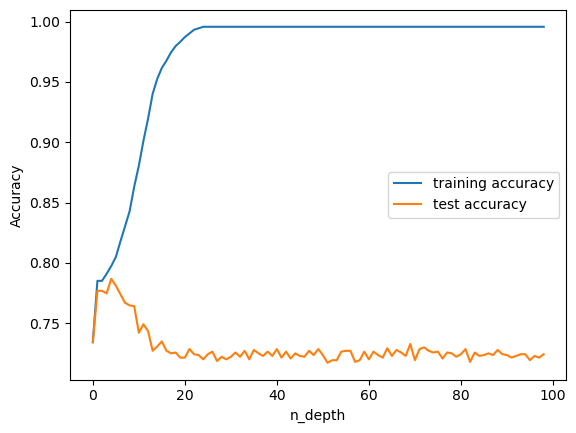

In [32]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

In [33]:


category_0 = final[final['Churn'] == 0]
category_1 = final[final['Churn'] == 1]

In [34]:
# Libaries
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
x = final.drop('Churn', axis = 1)
y = final['Churn']

x_tl, y_tl = tl.fit_resample(x, y)
y_tl.value_counts()

0    4596
1    1869
Name: Churn, dtype: int64